In [4]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../src')

from hamiltonian import *
from misc import *
from haldane_pseudopotential import *

In [5]:
#simulation parameters
#for MR_Pf state, v=5/2 and S=3
#N_phi=2(N_e)-3 for LL=2
N = 8
filling_factor_inv = 2
top_shift=3
Nphi = filling_factor_inv*N-top_shift

print('N_phi=',Nphi, 'flux quanta for N_e=',N,'electrons')

N_phi= 13 flux quanta for N_e= 8 electrons


In [6]:
#initialization (system configurations and parameters)
system = system(N, Nphi,0,True)

========Initializing possible states in spherical geometry========
completed in 0.013254880905151367 seconds
N = 8 electrons
Nphi = 13 flux quanta

========Constructing total angular momentum matrix========
 
completed in 0.10034894943237305 seconds


In [17]:
#pseudopotentials

#trial pseudopotential according to Greiter et al
trial_pp=np.array([0,0.1])
trial_pp=np.append(trial_pp, np.zeros((Nphi+1)-len(trial_pp)))
trial_pp = haldane_pseudopotential(system.Q, LLn = 1,custom=trial_pp)

#Coulomb pseudopotentials
pp = haldane_pseudopotential(system.Q, LLn = 1)

========Initializing interaction matrix========
Working on interaction matrix: 0.0 %
Working on interaction matrix: 7.142857142857142 %
Working on interaction matrix: 14.285714285714285 %
Working on interaction matrix: 21.428571428571427 %
Working on interaction matrix: 28.57142857142857 %
Working on interaction matrix: 35.714285714285715 %
Working on interaction matrix: 42.857142857142854 %
Working on interaction matrix: 50.0 %
Working on interaction matrix: 57.14285714285714 %
Working on interaction matrix: 64.28571428571429 %
Working on interaction matrix: 71.42857142857143 %
Working on interaction matrix: 78.57142857142857 %
Working on interaction matrix: 85.71428571428571 %
Working on interaction matrix: 92.85714285714286 %
completed in  11.362063884735107 seconds

========Initializing two-body pseudopotential========
completed in 0.1307239532470703 seconds
pseudopotential: [0.6709531  0.46953604 0.53437641 0.37840173 0.32265881 0.29038978
 0.26894893 0.25376199 0.24266378 0.23447

Text(0.5, 1.0, 'Haldane Pseudopotentials')

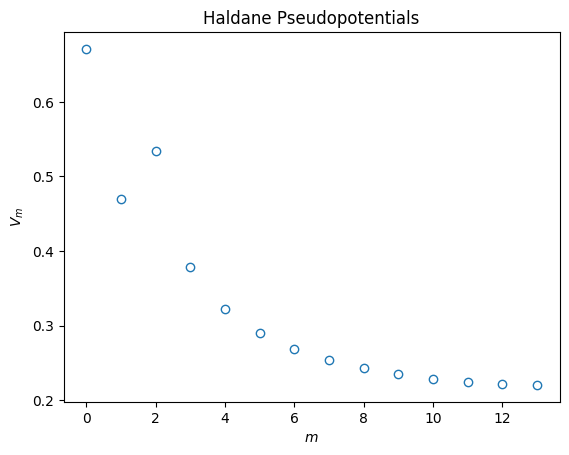

In [18]:
ax=plt.plot(pp.m, pp.V, ls="none", marker="o", mfc="none", label="$n=0$")
#ax=plt.plot(pp1.m, pp1.V, ls="none", marker="o", mfc="none", label="$trial$")
#ax=plt.plot(pp1.m, pp1.V, ls="none", marker="o", mfc="none", label="$trial$")
plt.xlabel('$m$')
plt.ylabel('$V_m$')
plt.title('Haldane Pseudopotentials')

========Constructing Hamiltonian of size 151 x 151 ========
Working on interaction matrix: 0.0 %
Working on interaction matrix: 5.298013245033113 %
Working on interaction matrix: 10.596026490066226 %
Working on interaction matrix: 15.894039735099339 %
Working on interaction matrix: 21.192052980132452 %
Working on interaction matrix: 26.490066225165563 %
Working on interaction matrix: 31.788079470198678 %
Working on interaction matrix: 37.086092715231786 %
Working on interaction matrix: 42.384105960264904 %
Working on interaction matrix: 47.682119205298015 %
Working on interaction matrix: 52.980132450331126 %
Working on interaction matrix: 58.27814569536424 %
Working on interaction matrix: 63.576158940397356 %
Working on interaction matrix: 68.87417218543047 %
Working on interaction matrix: 74.17218543046357 %
Working on interaction matrix: 79.47019867549669 %
Working on interaction matrix: 84.76821192052981 %
Working on interaction matrix: 90.06622516556291 %
Working on interaction mat

Text(0, 0.5, '$E$')

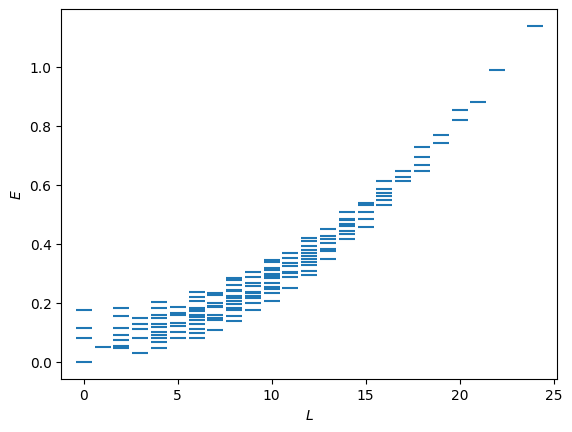

In [19]:
#create hamiltonian and diagonalize coulomb interaction
hamiltonian = spherical_system(system, pp.pp_matrix)
hamil=hamiltonian.h.A
energies, eigenstates=LA.eigh(hamil)

L2=system.L2.A
L,ene=L_spectrum(L2,hamil)

#plotting energetics
fig, ax = plt.subplots()
ax=plt.plot(L, ene, ls="none", marker="_", ms="12", mew="1.5")
#plt.title('Energetics of N=8 particles, $N_{\phi}$=21')

plt.xlabel('$L$')
plt.ylabel('$E$')

#plt.savefig('energectics_n8_nphi_21.png')

In [20]:
trial_hamiltonian = spherical_system(system, trial_pp.pp_matrix)
trial_hamil=trial_hamiltonian.h.A
trial_energies, trial_eigenstates=LA.eigh(trial_hamil)

L2=system.L2.A
L,ene=L_spectrum(L2,trial_hamil)
print('Energy spectrum:', L)

========Constructing Hamiltonian of size 151 x 151 ========
Working on interaction matrix: 0.0 %
Working on interaction matrix: 5.298013245033113 %
Working on interaction matrix: 10.596026490066226 %
Working on interaction matrix: 15.894039735099339 %
Working on interaction matrix: 21.192052980132452 %
Working on interaction matrix: 26.490066225165563 %
Working on interaction matrix: 31.788079470198678 %
Working on interaction matrix: 37.086092715231786 %
Working on interaction matrix: 42.384105960264904 %
Working on interaction matrix: 47.682119205298015 %
Working on interaction matrix: 52.980132450331126 %
Working on interaction matrix: 58.27814569536424 %
Working on interaction matrix: 63.576158940397356 %
Working on interaction matrix: 68.87417218543047 %
Working on interaction matrix: 74.17218543046357 %
Working on interaction matrix: 79.47019867549669 %
Working on interaction matrix: 84.76821192052981 %
Working on interaction matrix: 90.06622516556291 %
Working on interaction mat

Text(0, 0.5, '$E$')

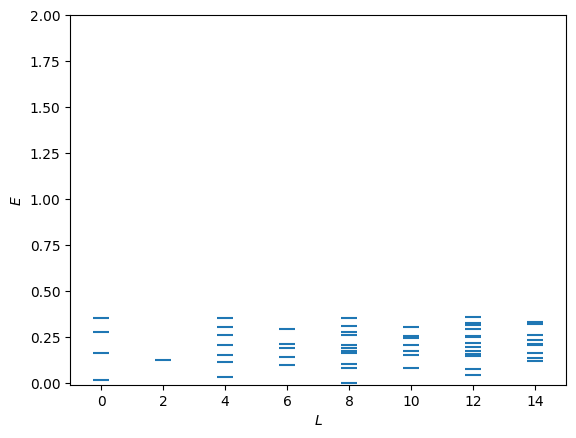

In [21]:
#plotting energetics

fig, ax = plt.subplots()
ax=plt.plot(2*L, ene, ls="none", marker="_", ms="12", mew="1.5")
plt.xlim(-1, 15)
plt.ylim(-0.01,2)
#plt.title('Energetics of N=8 particles, $N_{\phi}$=21')

plt.xlabel('$L$')
plt.ylabel('$E$')

#plt.savefig('energectics_n8_nphi_21.png')

In [22]:
overlap=overlap_Vectors(np.transpose(trial_eigenstates)[0],np.transpose(eigenstates)[0])

overlap of wavefunciton <Ψtrial|Ψexact>= 8.739482661862531e-15


Text(0, 0.5, '$E$')

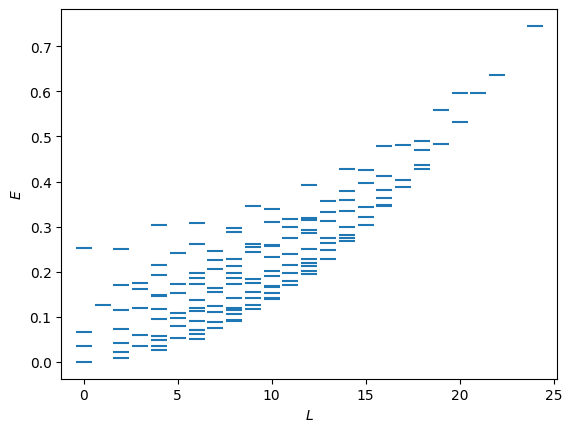

In [23]:
disorder_hamil=hamil-trial_hamil

#disorder_energies, disorder_eigenstates=LA.eigh(disorder_hamil)

L2=system.L2.A
L,ene=L_spectrum(L2,disorder_hamil)
#print('Energy spectrum:', L)

#plotting energetics
fig, ax = plt.subplots()
ax=plt.plot(L, ene, ls="none", marker="_", ms="12", mew="1.5")

#plt.title('Energetics of N=8 particles, $N_{\phi}$=21')

plt.xlabel('$L$')
plt.ylabel('$E$')

#plt.savefig('energectics_n8_nphi_21.png')

# Entanglement Spectrum

In [197]:
def entanglement_spectrum(psi, system, subsystemA, NA, LzAvec):
    psi = psi/LA.norm(psi)
    dim=len(psi)

    IAlist = np.zeros(psi.shape[0], dtype=int)
    NAlist = np.zeros(psi.shape[0], dtype=int)
    LzAlist = np.zeros(psi.shape[0], dtype=float)
    mzA = system.mzvals[subsystemA]

    for i in range(0,dim):
        nsA = system.occ_orbitals_nlist[i][subsystemA]
        IAlist[i] = I(nsA)
        NAlist[i] = np.sum(nsA)
        LzAlist[i] = np.dot(mzA, nsA)
    
    print(f"Calculating entanglement spectrum for NA = {NA}, LzA = {LzAvec} ...")

    ent_spectrum = np.zeros((0, 2), dtype=float)

    for LzA in LzAvec:
        print('iteration')
        strip_inds = np.intersect1d(np.where(NAlist == NA), np.where(LzAlist == LzA))
        IAlist_stripped = IAlist[strip_inds]
        sort_inds = np.argsort(IAlist_stripped)
        IAlist_stripped = IAlist_stripped[sort_inds]

        psi_stripped = psi[strip_inds][sort_inds]

        nc = np.sum(IAlist_stripped == IAlist_stripped[0])
        nr = int(psi_stripped.shape[0] / nc)
        psi_matrix = psi_stripped.reshape((nr, nc)).T

        rhoA = np.dot(psi_matrix, psi_matrix.T)
        evals = LA.eigvals(rhoA)
        xi = -np.log(evals[np.where(evals > 0)])

        spent_spectrumec = np.vstack((spec, np.hstack((np.full((len(xi), 1), LzA), np.sort(xi).reshape(-1, 1)))))

    return ent_spectrum

In [8]:
system.mzvals

array([-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5])

In [9]:
Norb=Nphi+1
mzvals=system.mzvals
system.mzvals
subsystemA = np.arange((Norb)/2,(Norb),dtype=int)
NA=int(N/2)
LzAvec = np.arange(sum(mzvals[subsystemA][0:NA]),sum(mzvals[subsystemA][NA-1:None])+1) #noninclusive endpoint 

In [10]:
ent_spec=system.entanglement_spectrum(eigenstates[0],subsystemA,NA,LzAvec)

Calculating entanglement spectrum for NA = 3, LzA = [ 4.5  5.5  6.5  7.5  8.5  9.5 10.5] ...
iteration
iteration
iteration
iteration
iteration
iteration
iteration


In [11]:
ent_spec

array([[ 4.5       +0.j,  2.38723035-0.j],
       [ 5.5       +0.j,  1.01840848-0.j],
       [ 6.5       +0.j,  3.01257333-0.j],
       [ 6.5       +0.j, 64.30719608-0.j],
       [ 7.5       +0.j,  2.11355429-0.j],
       [ 7.5       +0.j,  5.89826081-0.j],
       [ 8.5       +0.j,  3.254515  -0.j],
       [ 8.5       +0.j, 71.13832615-0.j],
       [ 9.5       +0.j,  6.11296986-0.j],
       [10.5       +0.j,  8.99318925-0.j]])

/Users/logange/opt/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


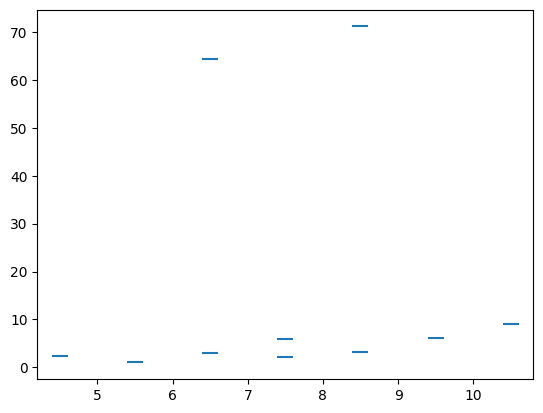

In [12]:
#plotting energetics

fig, ax = plt.subplots()
ax=plt.plot(ent_spec[:,0], ent_spec[:,1], ls="none", marker="_", ms="12", mew="1.5")